<a href="https://colab.research.google.com/github/itsLaraib/MaskImagesClassification/blob/main/flight_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**~EaseMyTrip FLIGHT PRICE PREDICTION**

##Introduction
In this notebook I have tried to conduct a statistical analysis and get answers to these questions:
* Does price vary with Airlines?
* How is the price affected when tickets are bought in just 1 or 2 days before departure?
* Does ticket price change based on the departure time and arrival time?
* How the price changes with change in Source and Destination?
* How does the ticket price vary between Economy and Business class?

Apart from this I have also created a regression model to predict the price of the flight based on the features provided with this dataset.

Datasetlink:https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

###The features of this dataset are as follows:
1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10.Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. Price: Target variable stores information of the ticket price.

#01. Importing the Libraries

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns

#2. Downloading and Loading the dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data')

Skipping, found downloaded files in "./flight-price-prediction" (use force=True to force download)


In [ ]:
data_dir='/content/flight-price-prediction'

In [ ]:
cleaned_df=pd.read_csv(data_dir+'/Clean_Dataset.csv')
business_df=pd.read_csv(data_dir+'/business.csv')
economy_df=pd.read_csv(data_dir+'/economy.csv')

In [ ]:
cleaned_df.drop(cleaned_df.columns[0],axis=1,inplace=True)

In [ ]:
cleaned_df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
economy_df.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
cleaned_df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


#3. Data Analysis: finding the answers to questions

###Q:Does price vary with Airlines?

In [ ]:
cleaned_df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

<Axes: ylabel='price'>

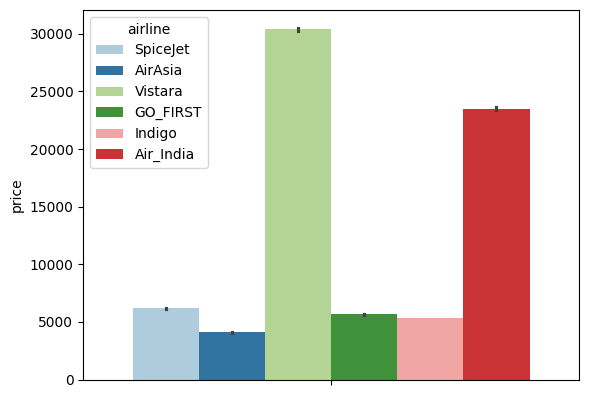

In [ ]:
sns.barplot(data=cleaned_df,hue=cleaned_df['airline'],y=cleaned_df['price'],palette='Paired')

###A: Yes! Vistara and Air_India have higher prices as compared to other airlines which are about the same price but Vistara outshines

###Q:How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [ ]:
def days_left_func(i):
  if i>2:
    return 'Above 2 days'
  else:
    return 'Under 2 days'

In [ ]:
cleaned_df['days']=cleaned_df['days_left'].apply(days_left_func)
cleaned_df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Under 2 days
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Under 2 days
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Under 2 days
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Under 2 days
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Under 2 days


<Axes: ylabel='price'>

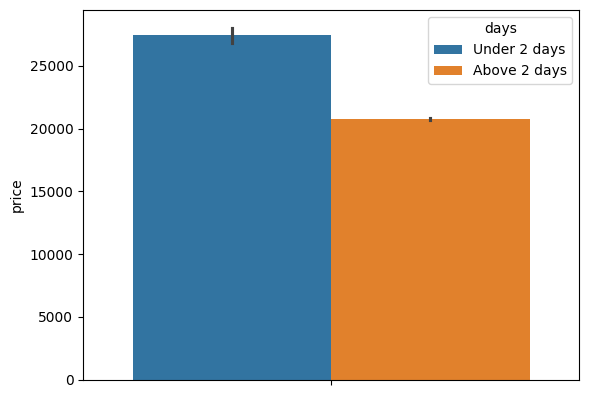

In [ ]:
sns.barplot(data=cleaned_df,hue='days',y='price')

###A: Prices are higher if the number of days left are less

###Q: Does ticket price change based on the departure time and arrival time?

In [ ]:
cleaned_df.departure_time.unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

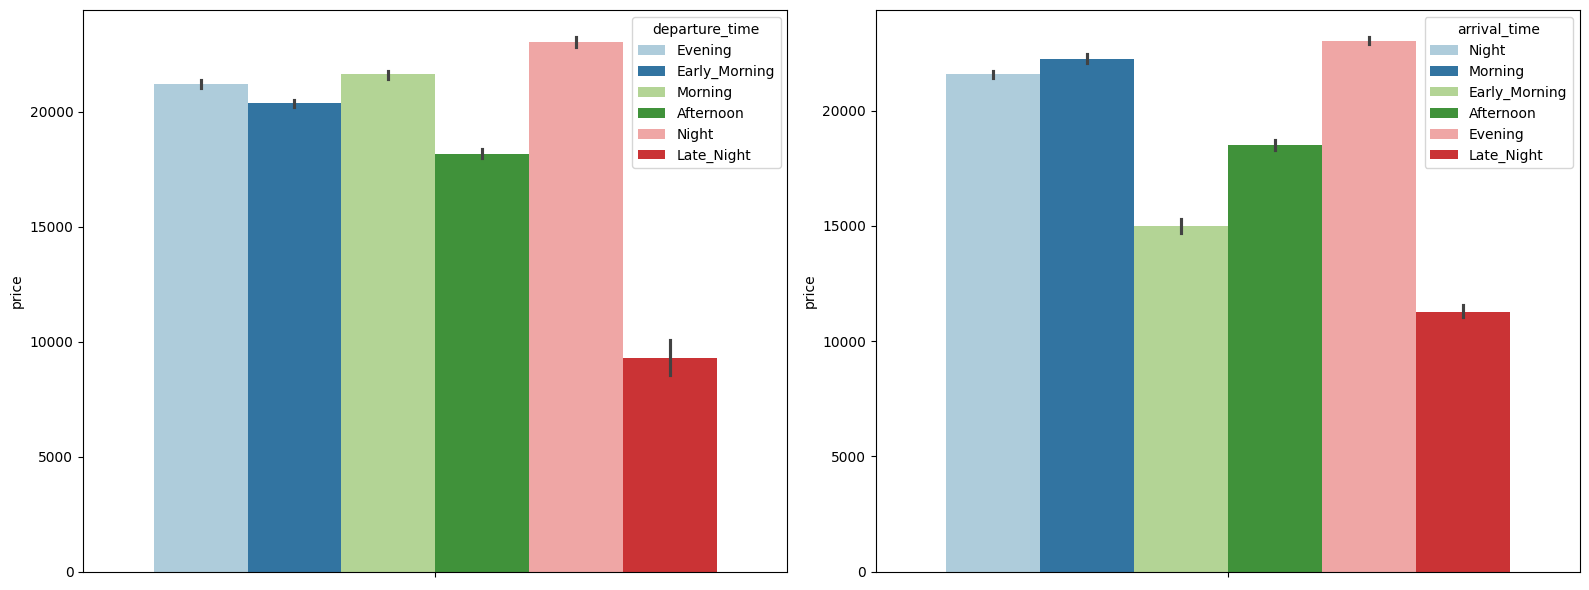

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,6))
sns.barplot(ax=ax[0],data=cleaned_df,hue='departure_time',y='price',palette='Paired')

sns.barplot(ax=ax[1],data=cleaned_df,hue='arrival_time',y='price',palette='Paired')

plt.tight_layout()
plt.show()

###A. Yes the prices changes based on the departure and arrival time

###Q: How the price changes with change in Source and Destination?

Text(0, 0.5, 'Price (INR)')

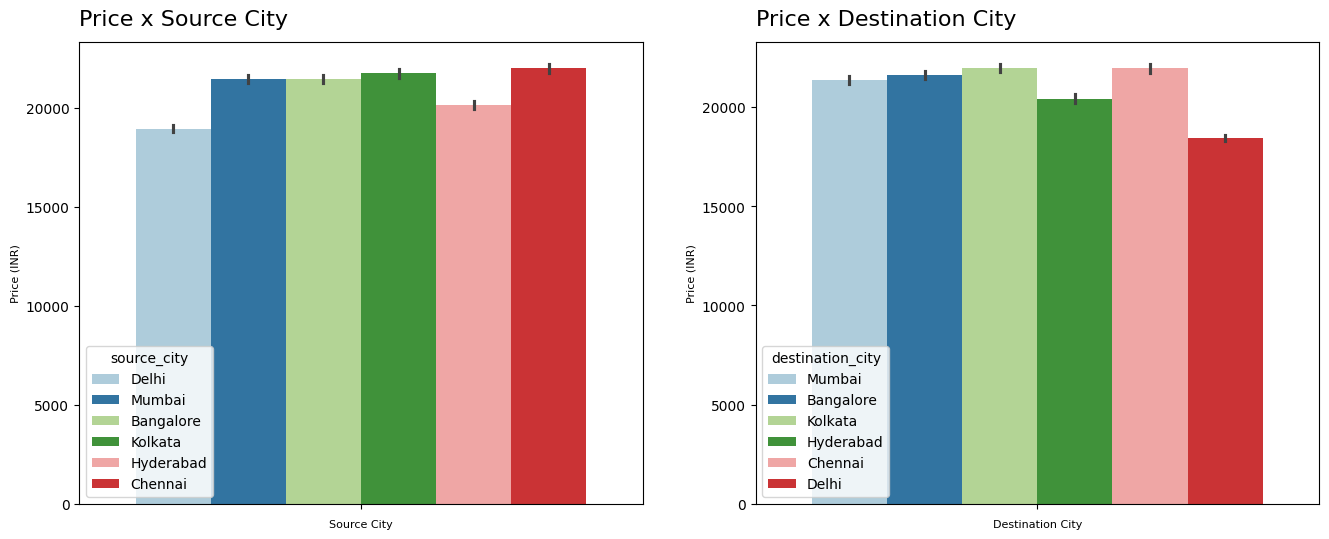

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(16,6))

sns.barplot(ax=axes[0],data=cleaned_df,hue='source_city',y='price',palette='Paired')
axes[0].set_title("Price x Source City", loc = 'left', fontsize = 16, pad = 12)
axes[0].set_xlabel("Source City", fontsize = 8)
axes[0].set_ylabel("Price (INR)", fontsize = 8)

sns.barplot(ax=axes[1],data=cleaned_df,hue='destination_city',y='price',palette='Paired')
axes[1].set_title("Price x Destination City", loc = 'left', fontsize = 16, pad = 12)
axes[1].set_xlabel("Destination City", fontsize = 8)
axes[1].set_ylabel("Price (INR)", fontsize = 8)


###A: Yes the prices vary with the change in source and destination. Chennai is the highest source

###Q: How does the ticket price vary between Economy and Business class?

<Axes: ylabel='price'>

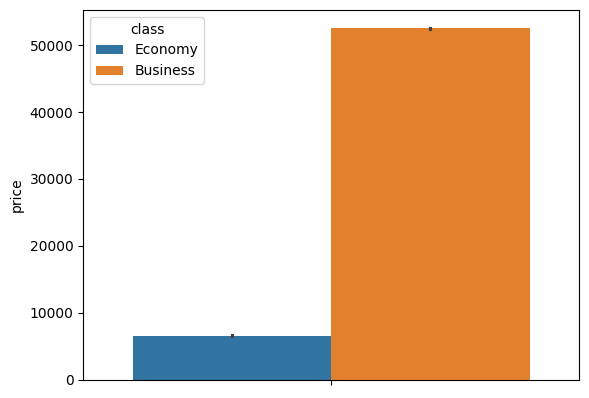

In [ ]:
sns.barplot(data=cleaned_df,hue='class',y='price')

###A: Yes! Business class prices are much higher than economy class

In [ ]:
corr_matrix=cleaned_df.corr(numeric_only=True)

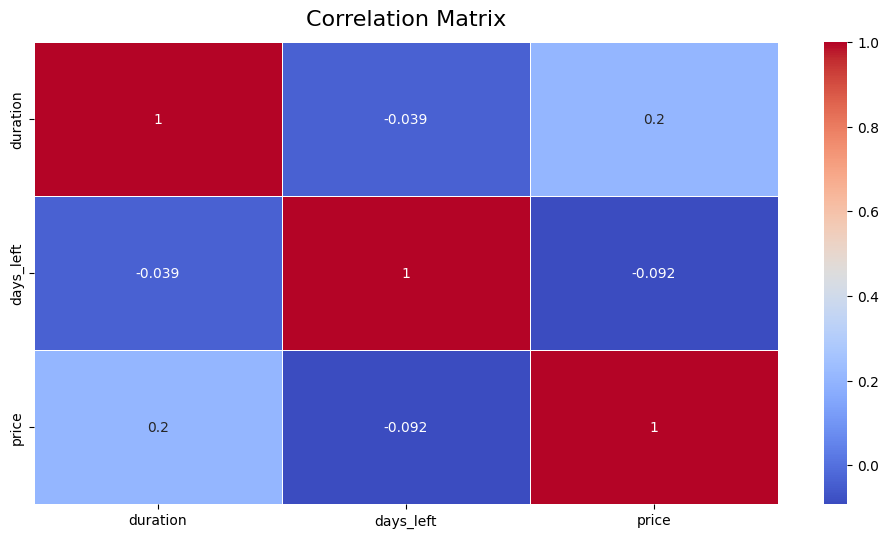

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True,linecolor='white',linewidth=0.5,cmap='coolwarm')
ax.set_title('Correlation Matrix',fontsize=16,pad=12)
plt.show()

#4. Seperating Features and Targets



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X,val_X=train_test_split(cleaned_df,test_size=0.2,random_state=42)

In [ ]:
len(train_X),len(val_X)

(240122, 60031)

In [ ]:
def duration_to_minutes(duration):
  hrs,mins=str(duration).split('.')
  total=int(hrs)*60+int(mins)
  return total

In [ ]:
cleaned_df['duration']=cleaned_df['duration'].apply(duration_to_minutes)

In [ ]:
cleaned_df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,days
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,137,1,5953,Under 2 days
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,153,1,5953,Under 2 days


In [ ]:
input_cols=['airline','source_city','departure_time','stops','arrival_time','destination_city','class','duration','days_left']
target_col='price'

In [ ]:
train_inputs=train_X[input_cols]
train_targets=train_X[target_col]
val_inputs=val_X[input_cols]
val_targets=val_X[target_col]

#5. Encoding and Scaling

##Dummy Encoding

In [ ]:
def dummy_encoder(df):
  return pd.get_dummies(data=df,columns=['airline','source_city','departure_time','arrival_time','stops','destination_city','class'],drop_first=True,dtype=int)

In [ ]:
train_inputs=dummy_encoder(train_inputs)
val_inputs=dummy_encoder(val_inputs)

In [ ]:
train_inputs['duration']=train_inputs['duration'].apply(duration_to_minutes)
val_inputs['duration']=val_inputs['duration'].apply(duration_to_minutes)

##Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
def scaler_func(df,cols):
  return scaler.fit_transform(df[cols])

In [ ]:
train_inputs[['duration','days_left']]=scaler_func(train_inputs,['duration','days_left'])

In [ ]:
val_inputs[['duration','days_left']]=scaler_func(val_inputs,['duration','days_left'])

#6. Creating a Baseline Model

In [ ]:
tracker_df={
    'Model':[],
    'train_rmse':[],
    'val_rmse':[]
}

In [ ]:
from sklearn.metrics import mean_squared_error
def mse(targets,preds):
  return mean_squared_error(targets,preds)

In [ ]:
def try_model(model,model_name):
  model.fit(train_inputs,train_targets)
  train_mse=mse(train_targets,model.predict(train_inputs))
  val_mse=mse(val_targets,model.predict(val_inputs))
  tracker_df['Model'].append(model_name)
  tracker_df['train_rmse'].append(train_mse)
  tracker_df['val_rmse'].append(val_mse)
  return train_mse,val_mse

##Mean Regressor Model

In [ ]:
class MeanRegressor():
  def fit(self,inputs,targets):
    self.mean=np.mean(targets)
  def predict(self, inputs):
    return np.full(inputs.shape[0],self.mean)

In [ ]:
mean_model=MeanRegressor()

In [ ]:
try_model(mean_model,'Mean Model')

(515113083.8033718, 515482303.16783273)

##Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model=LinearRegression()

In [ ]:
try_model(linear_model,'Linear Model')

(45593282.68065331, 45723617.581706844)

##Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model=Ridge()

In [ ]:
try_model(ridge_model,'Ridge')

(45593282.95637718, 45723607.68569524)

##Elastic Regression

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_model=ElasticNet()

In [ ]:
try_model(elastic_model,'Elastic Model')

(251208658.78859487, 250887812.6099477)

In [ ]:
pd.DataFrame(tracker_df)

,Model,train_rmse,val_rmse
0,Mean Model,5.151131e+08,5.154823e+08
1,Linear Model,4.559328e+07,4.572362e+07
2,Ridge,4.559328e+07,4.572361e+07
3,Elastic Model,2.512087e+08,2.508878e+08


From this we can see that Linear Regression and Ridge Regression model preforms better

##XGB Regressor

In [ ]:
!pip install XGBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb=XGBRegressor()
try_model(xgb,'XGB Regressor')

(11571376.15999283, 16348251.401087899)

In [ ]:
pd.DataFrame(tracker_df)

,Model,train_rmse,val_rmse
0,Mean Model,5.151131e+08,5.154823e+08
1,Linear Model,4.559328e+07,4.572362e+07
2,Ridge,4.559328e+07,4.572361e+07
3,Elastic Model,2.512087e+08,2.508878e+08
4,XGB Regressor,1.157138e+07,1.634825e+07
5,XGB Regressor,1.157138e+07,1.634825e+07


In [ ]:
xgb.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_train = xgb.predict(train_inputs)
y_pred_val = xgb.predict(val_inputs)

In [ ]:
mse_train = mean_squared_error(train_targets, y_pred_train)
mse_test = mean_squared_error(val_targets, y_pred_val)

In [ ]:
print("Model metrics")
print("=" * 50)
print(f'Mean Squared Error in Train: {mse_train}')
print(f'Mean Squared Error in Test: {mse_test}')

Model metrics
Mean Squared Error in Train: 11571376.15999283
Mean Squared Error in Test: 16348251.401087899


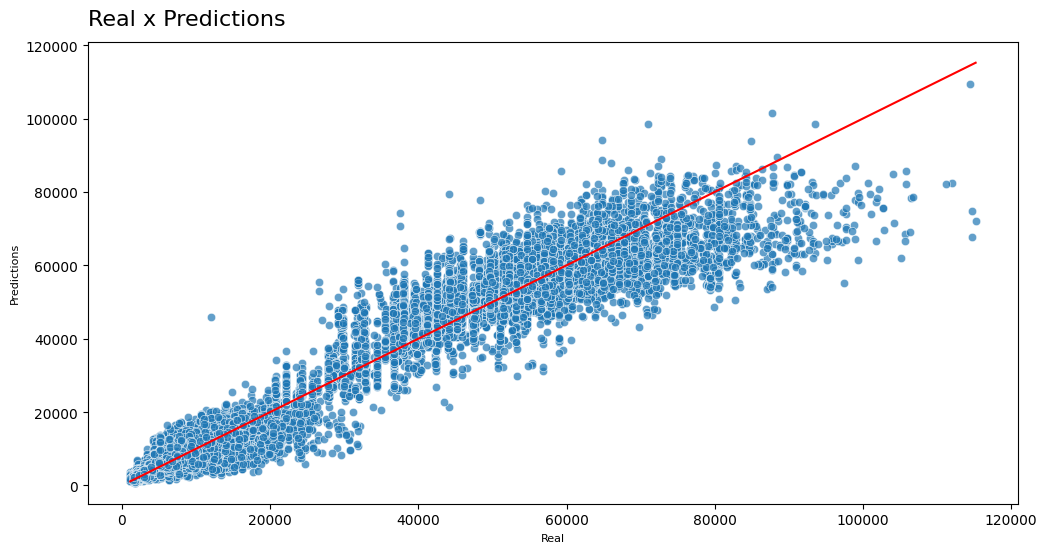

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.scatterplot(x = val_targets, y = y_pred_val,alpha=0.7)
ax.set_title('Real x Predictions', loc = 'left', fontsize = 16, pad = 12)
ax.set_xlabel('Real', fontsize = 8)
ax.set_ylabel('Predictions', fontsize = 8)
plt.plot([min(val_targets), max(val_targets)], [min(val_targets), max(val_targets)], color = 'red')
plt.show()